In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import set_config
%matplotlib inline
plt.figure(figsize=(20,15))
set_config(display='diagram')
sns.set_style('darkgrid')
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',100)
warnings.filterwarnings('ignore')

<Figure size 1440x1080 with 0 Axes>

In [2]:
titanic = pd.read_csv('data/train.csv')
titanic_test = pd.read_csv('data/test.csv')
titanic.shape, titanic_test.shape
titanic_train = titanic.copy()

In [3]:
titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.sample(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'count missing values')

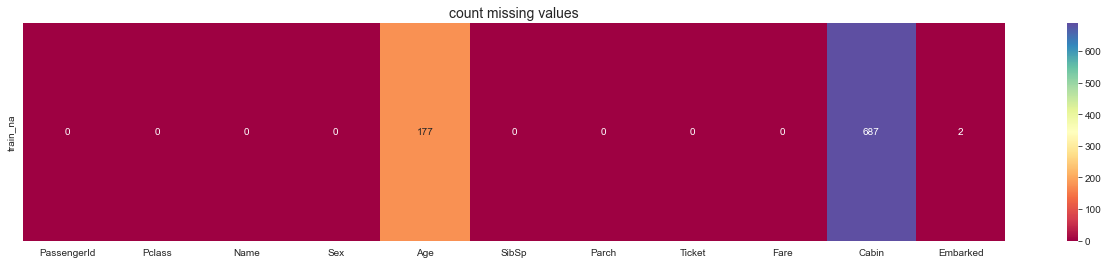

In [5]:
titanic.info()
plt.figure(figsize=(22,4))
sns.heatmap((titanic.drop(columns='Survived').isna().sum()).to_frame(name='train_na').T,cmap='Spectral', 
            annot=True, fmt='0.0f').set_title('count missing values', fontsize=14)

Passenger ID can serve as index, doesn't seem to provide descriptive data otherwise

Name may be used to impute missing ages, title (Mr., Mrs., Master, Miss) seem to correspond to passenger age

Some values of ticket have letters and other non-numeric characters, some appear to be only numeric. Doesn't seem to provide descriptive data.

Many missing values for Cabin. Cabin consists of a letter and sometimes numbers as well. It's possible Fare may be used to impute missing letters, if there is a correlation between fare cost and Cabin letter. Will reduce Cabin to a string of leading letter, as imputing the numbers seems unlikely.

Embarked has two missing values, can impute with most frequent value

In [6]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
titanic_train = titanic_train.set_index(['PassengerId'])
def Title_cabin(df):
    df.Cabin = df.Cabin.astype(str)
    df['Title'] = df['Name'].map(lambda x: 'Mr.' if 'Mr.' in x else 'Mrs.' if 'Mrs.' in x else 'Master.' if 'Master.' in x else 'Miss.' if 'Miss.' in x else None)
    df['Cabin_Group'] = df['Cabin'].map(lambda x: 'A' if 'A' in x else 'B' if 'B' in x else 'C' if 'C' in x else 'D' if 'D' in x else 'E' if 'E' in x else 'F' if 'F' in x else None)   

    df.drop(columns=['Name','Ticket','Cabin'], axis = 1, inplace=True)
    
    return df

Title_cabin(titanic_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Group
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr.,None
2,1,1,female,38.0,1,0,71.2833,C,Mrs.,C
3,1,3,female,26.0,0,0,7.9250,S,Miss.,None
4,1,1,female,35.0,1,0,53.1000,S,Mrs.,C
5,0,3,male,35.0,0,0,8.0500,S,Mr.,None
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,None,None
888,1,1,female,19.0,0,0,30.0000,S,Miss.,B
889,0,3,female,NaN,1,2,23.4500,S,Miss.,None


In [8]:
titanic_train.Survived = titanic_train.Survived.astype(bool)

In [9]:
titanic_train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Group
PassengerId,,,,,,,,,,
1,False,3,male,22.0,1,0,7.2500,S,Mr.,None
2,True,1,female,38.0,1,0,71.2833,C,Mrs.,C
3,True,3,female,26.0,0,0,7.9250,S,Miss.,None
4,True,1,female,35.0,1,0,53.1000,S,Mrs.,C
5,False,3,male,35.0,0,0,8.0500,S,Mr.,None
6,False,3,male,NaN,0,0,8.4583,Q,Mr.,None
7,False,1,male,54.0,0,0,51.8625,S,Mr.,E
8,False,3,male,2.0,3,1,21.0750,S,Master.,None
9,True,3,female,27.0,0,2,11.1333,S,Mrs.,None


In [10]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    bool   
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Title        864 non-null    object 
 9   Cabin_Group  199 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 70.5+ KB


Must impute ages before imputing missing titles (if age and title seem related)

Must impute many missing Cabin_Group values, as well as two Embarked values

In [11]:
cat_col = []
num_col = []
def convert_types(df):
    global cat_col , num_col
    cat_col = ['Sex', 'Embarked', 'Title', 'Cabin_Group']
    num_col = ['Pclass', 'Age', 'SibSp','Parch', 'Fare']
    for i in cat_col:
        df[i] = df[i].astype('category')
    for i in (num_col):
        df[i] = df[i].astype('float')
    return df
        

convert_types(titanic_train)
titanic_train.head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Group
PassengerId,,,,,,,,,,
1,False,3.0,male,22.0,1.0,0.0,7.2500,S,Mr.,NaN
2,True,1.0,female,38.0,1.0,0.0,71.2833,C,Mrs.,C
3,True,3.0,female,26.0,0.0,0.0,7.9250,S,Miss.,NaN
4,True,1.0,female,35.0,1.0,0.0,53.1000,S,Mrs.,C
5,False,3.0,male,35.0,0.0,0.0,8.0500,S,Mr.,NaN
6,False,3.0,male,NaN,0.0,0.0,8.4583,Q,Mr.,NaN
7,False,1.0,male,54.0,0.0,0.0,51.8625,S,Mr.,E
8,False,3.0,male,2.0,3.0,1.0,21.0750,S,Master.,NaN
9,True,3.0,female,27.0,0.0,2.0,11.1333,S,Mrs.,NaN


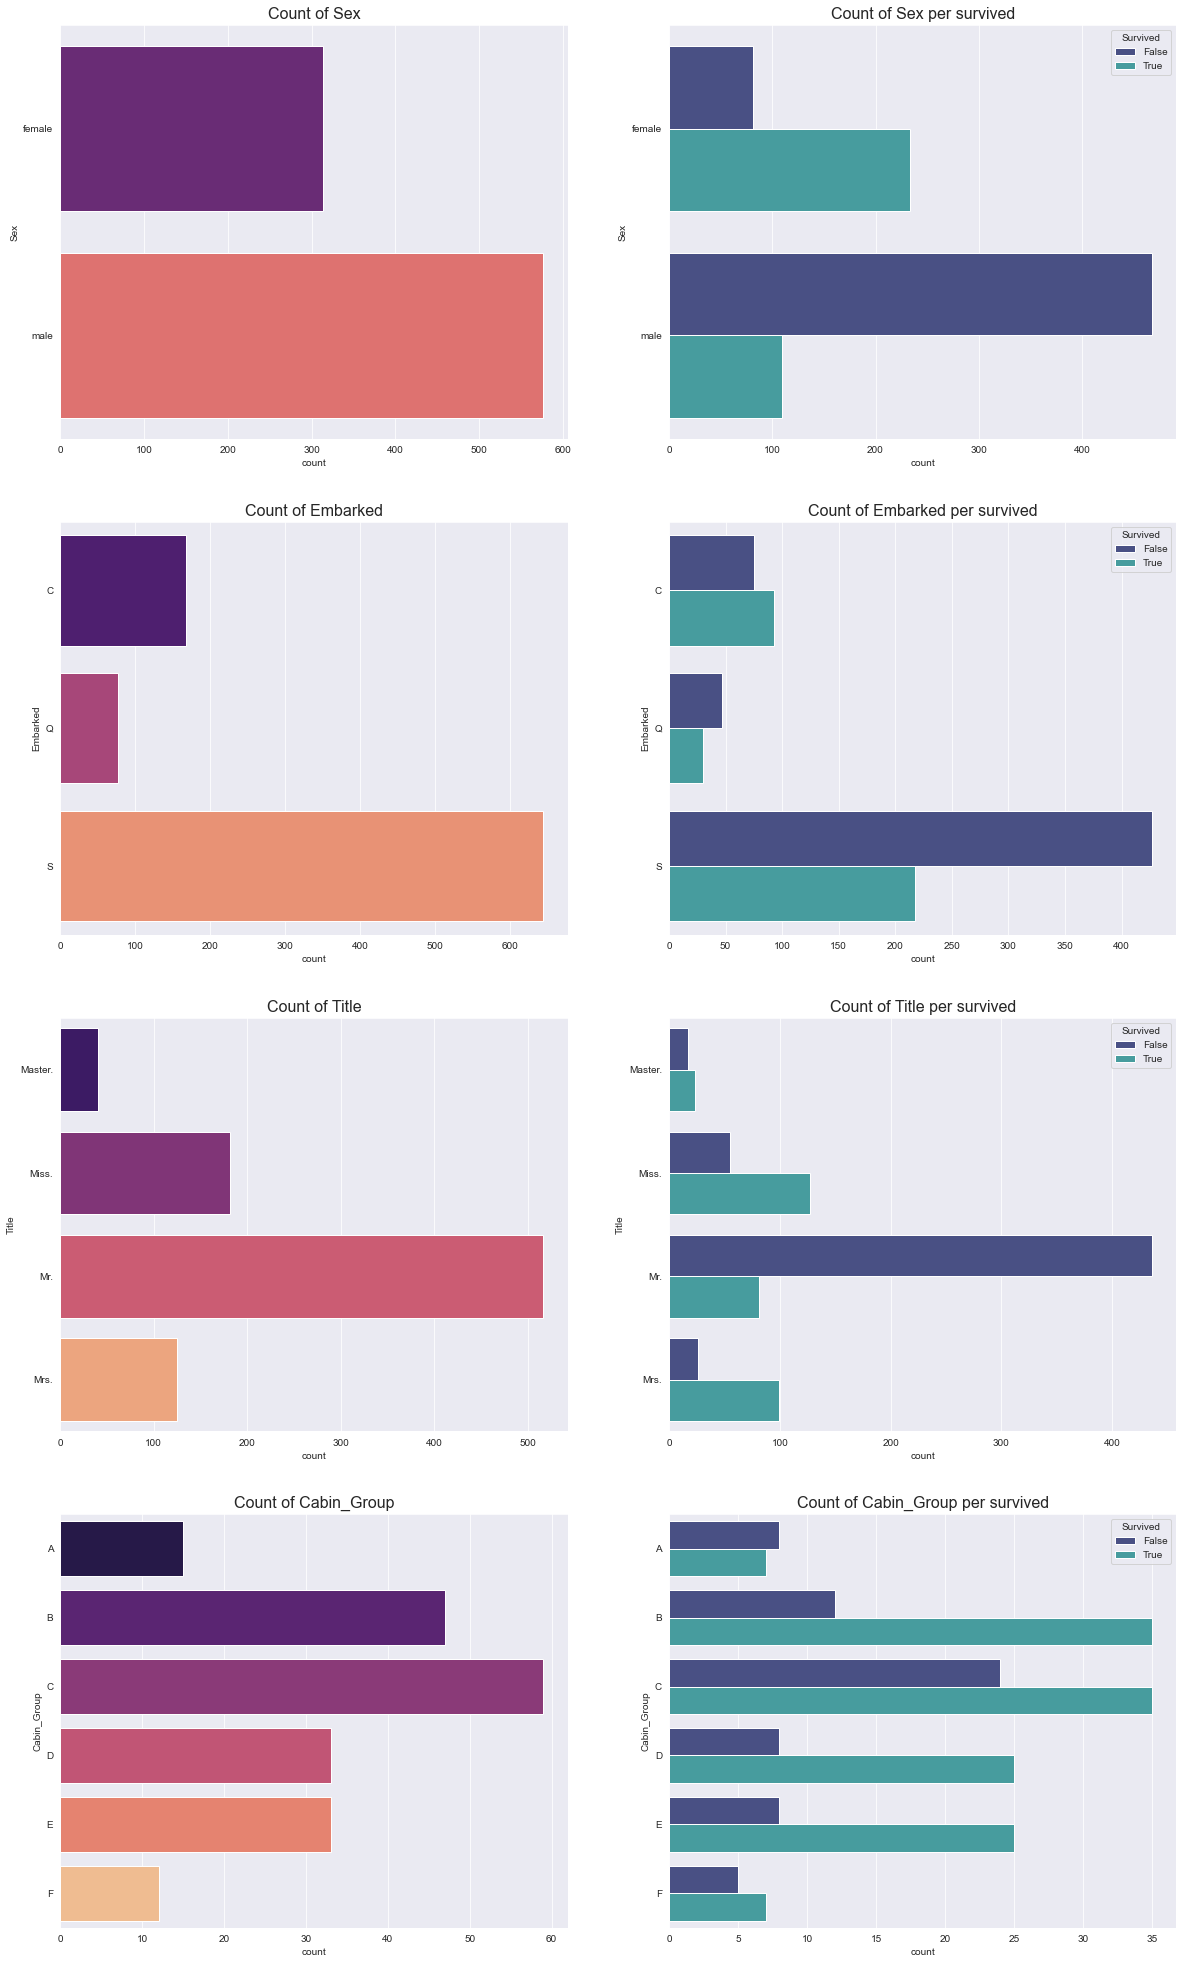

In [12]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
idx = 0
for col in cat_col:
    sns.countplot(data=titanic_train, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    sns.countplot(data=titanic_train, y=col, palette='mako', orient='h',  hue='Survived',
                  ax=axes[idx][1]).set_title(f'Count of {col} per survived', fontsize='16')
    idx +=1
plt.show()

About 2:1 men to women ratio, yet women survived at much higher proportion than men.

Interestingly, it seems that unmarried women (Miss.) survived at a lower rate than married women (Mrs.) Young men (Master.) survived at much higher rates than their older counterparts (Mr.)

Where passengers embarked seems be a significant factor as well. Passengers who embarked at Cherbourg survived at much higher rates than those who embarked at Queenstown and Southampton, the latter two surviving at similar rates.

Though cabin group is unknown for many passengers, there is also variance in the rates of survival among known cabin groups. The two least populated cabins, A & F, (by a record that includes data for only ~25% of the total passengers) fared the worst in survival rate, while survival rate across other cabin groups is fairly similar

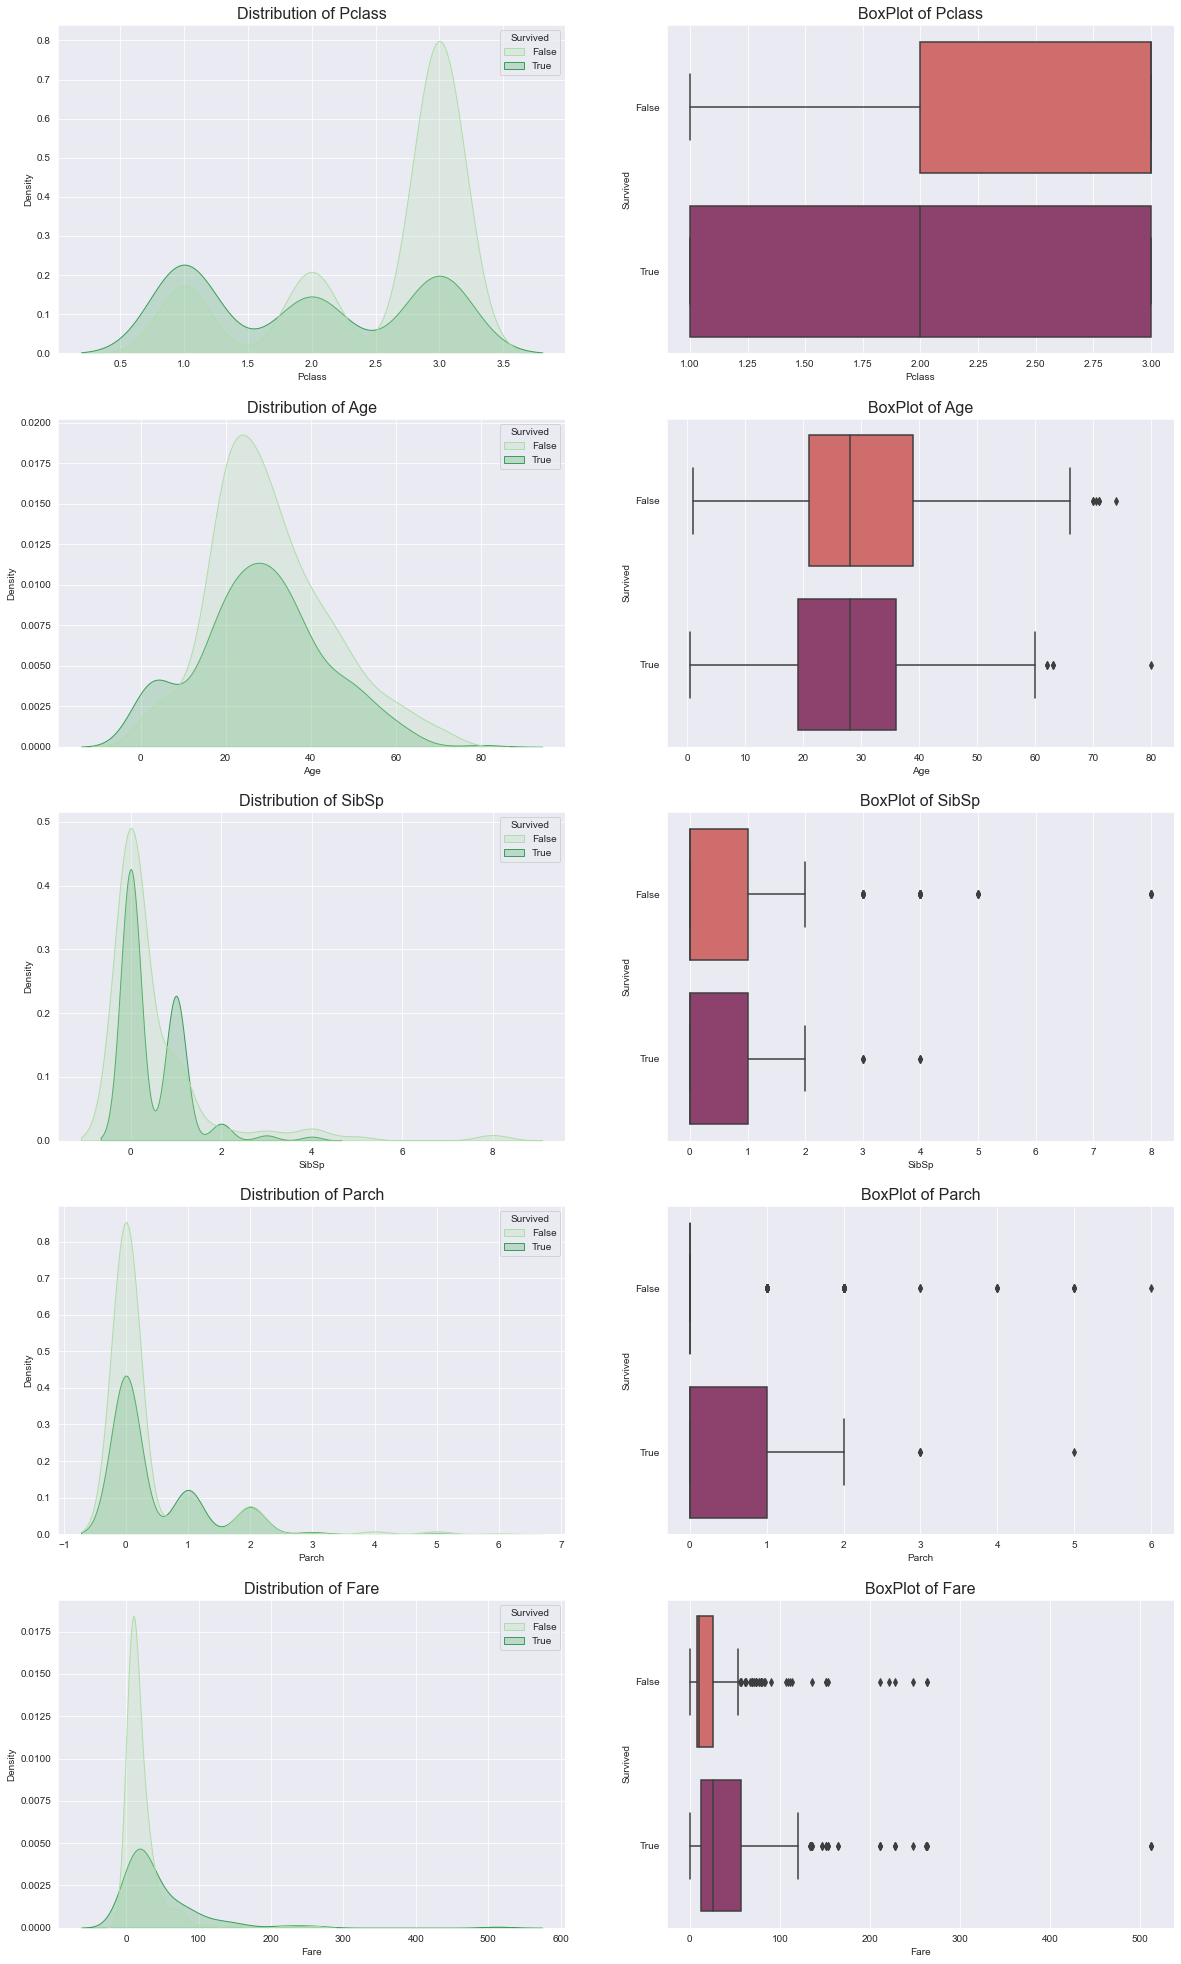

In [13]:
fig, axes = plt.subplots(5,2, figsize=(20,35))
idx = 0
for col in (num_col):
    sns.kdeplot(data=titanic_train, x=col, palette='Greens',fill=True , hue='Survived', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=titanic_train, x=col, palette='flare' , y='Survived', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

Passengers tended to survive at higher rates the lower their Pclass was (i.e 1 survived at greatest rates, followed by 2, followed by 3). Rates of survival were significantly different among the 3 Pclasses, with 3rd class compromising the most passengers.

Survival rates among different ages were fairly similar for ages above 35. Passengers under the age of 15 survived at greater rates than average, while passengers near and slightly younger than the median age of ~30 appear to have died at the highest rates among passengers.

Number of siblings and spouses aboard appears to affect survival rate slightly, with passengers with 1 sibling or spouse surviving at a much higher rate than other SibSp values. 2 SibSp also had a higher survival rate than average, while the other values tend to have similar survival rates. This can possibly be accounted for by the greater survival rate of married women compared to unmarried women.

All values of parents and children aboard greater than 0 enjoyed greater survival rates than those passengers without parents or children aboard, which was the most common Parch value for passengers. This can possibly be explained by passengers under 15 who survived at higher rates than the general population aboard.

On average, lower fares were correlated with lower survival rates.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    bool    
 1   Pclass       891 non-null    float64 
 2   Sex          891 non-null    category
 3   Age          714 non-null    float64 
 4   SibSp        891 non-null    float64 
 5   Parch        891 non-null    float64 
 6   Fare         891 non-null    float64 
 7   Embarked     889 non-null    category
 8   Title        864 non-null    category
 9   Cabin_Group  199 non-null    category
dtypes: bool(1), category(4), float64(5)
memory usage: 46.8 KB


Text(0.5, 1.0, 'count missing values')

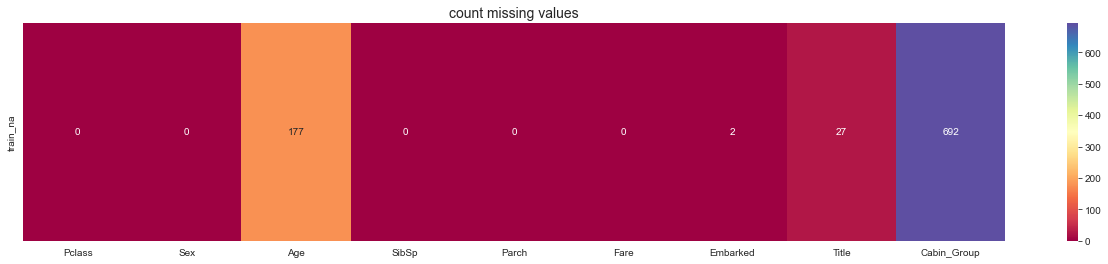

In [14]:
titanic_train.info()
plt.figure(figsize=(22,4))
sns.heatmap((titanic_train.drop(columns='Survived').isna().sum()).to_frame(name='train_na').T,cmap='Spectral', 
            annot=True, fmt='0.0f').set_title('count missing values', fontsize=14)

Can use Label Encoder and Random Forest Imputer to impute missing values for Age, Title, and Cabin Group.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

categorical = ['Sex', 'Embarked', 'Title', 'Cabin_Group']
numerical = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

titanic_train[categorical] = titanic_train[categorical].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

titanic_train[numerical] = imp_num.fit_transform(titanic_train[numerical])
titanic_train[categorical] = imp_cat.fit_transform(titanic_train[categorical])

In [16]:
titanic_train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Group
PassengerId,,,,,,,,,,
1,False,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0,2.0,2.0
2,True,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,3.0,2.0
3,True,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0,1.0,1.0
4,True,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0,3.0,2.0
5,False,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0,2.0,2.0
6,False,3.0,1.0,23.562727,0.0,0.0,8.4583,1.0,2.0,2.0
7,False,1.0,1.0,54.000000,0.0,0.0,51.8625,2.0,2.0,4.0
8,False,3.0,1.0,2.000000,3.0,1.0,21.0750,2.0,0.0,5.0
9,True,3.0,0.0,27.000000,0.0,2.0,11.1333,2.0,3.0,2.0


Note: categorical columns have been transformed by label encoder, here is a key for how values correspond to categories.

Sex: 0 - female, 1 - male

Embarked: 0 - Cherbourg, 1 - Queenstown, 2 - Southampton

Title: 0 - Master., 1 - Miss., 2 - Mr., 3 - Mrs.

Cabin_Group: 0 - A, 1 - B, 2 - C, 3 - D, 4 - E, 5 - F

**May need to try using one hot encoder mapped onto these values, to see if that changes the predictive performance of modeling**

Exploring relationships between features:

Fare & Cabin_Group

Age & Fare

Sex & Fare

Pclass & Fare

Pclass & Embarked

Fare & Embarked

Cabin_Group, Pclass & Embarked [x]

Age, Sex & Title [x]

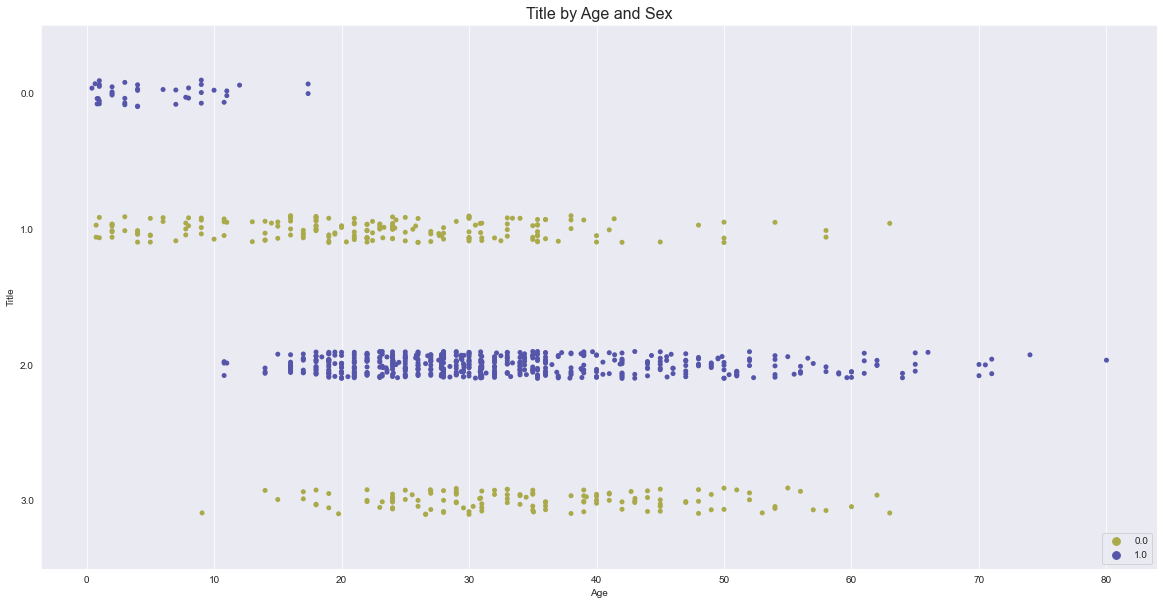

In [17]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.stripplot(data=titanic_train, x='Age', palette='gist_stern_r', hue='Sex', y='Title', orient='h',ax=ax)
ax.set_title('Title by Age and Sex', fontsize='16')
ax.legend(loc=4);

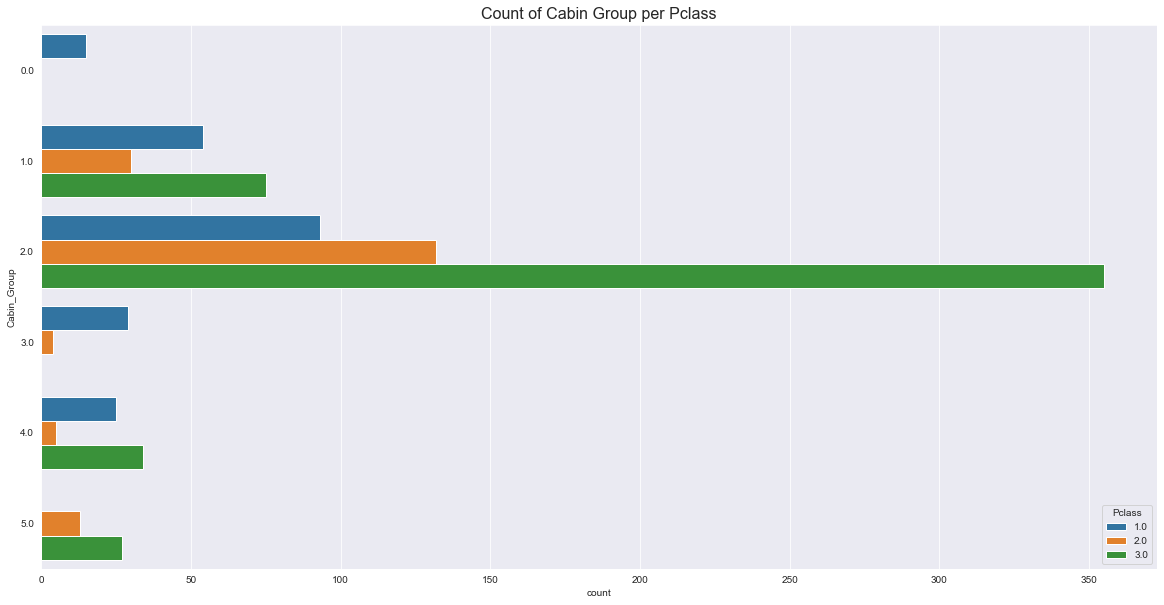

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.countplot(data=titanic_train, y='Cabin_Group', orient='h',  hue='Pclass',
                  ax=ax).set_title(f'Count of Cabin Group per Pclass', fontsize='16')
plt.show();

A few interesting trends from this graph, coupled with survivors by Cabin Group graph. Passengers in Cabin A were exclusively first class, which had the highest survival rate among Pclasses, but Cabin A has the lowest survival rate of Cabin Groups. Cabin F has no first class passengers, and the lowest survival rate besides Cabin A. Other Cabins seem to have survival rates consistent with the trend that more premium class passengers generally survive at higher rates.

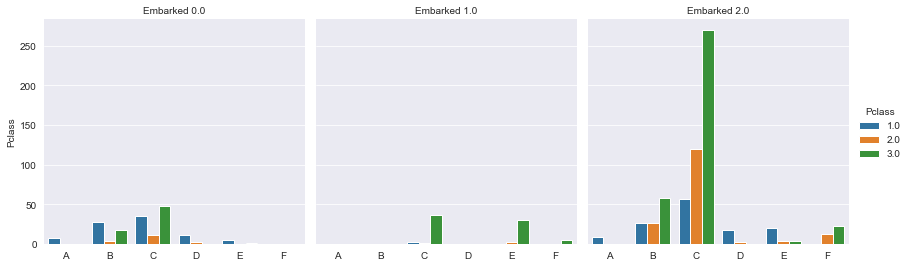

In [19]:
g = sns.catplot(
    data=titanic_train, x='Cabin_Group', y=None, hue='Pclass', col='Embarked',
    kind="count", height=4
)
g.set_axis_labels("", "Pclass")
g.set_xticklabels(["A", "B", "C", "D", "E", "F"])
g.set_titles("{col_var} {col_name}")
g.despine(left=True);

This graph shows the distribution among passenger classes & cabin groups by location of embarkation. Distribution among Cabin Groups looks fairly regular, however Passengers from Cherbourg seem to be in first class at higher rates than passengers from other locations. Though it is a small sample, passengers from Queenstown appear to be in third class at higher rates than passengers from other locations.

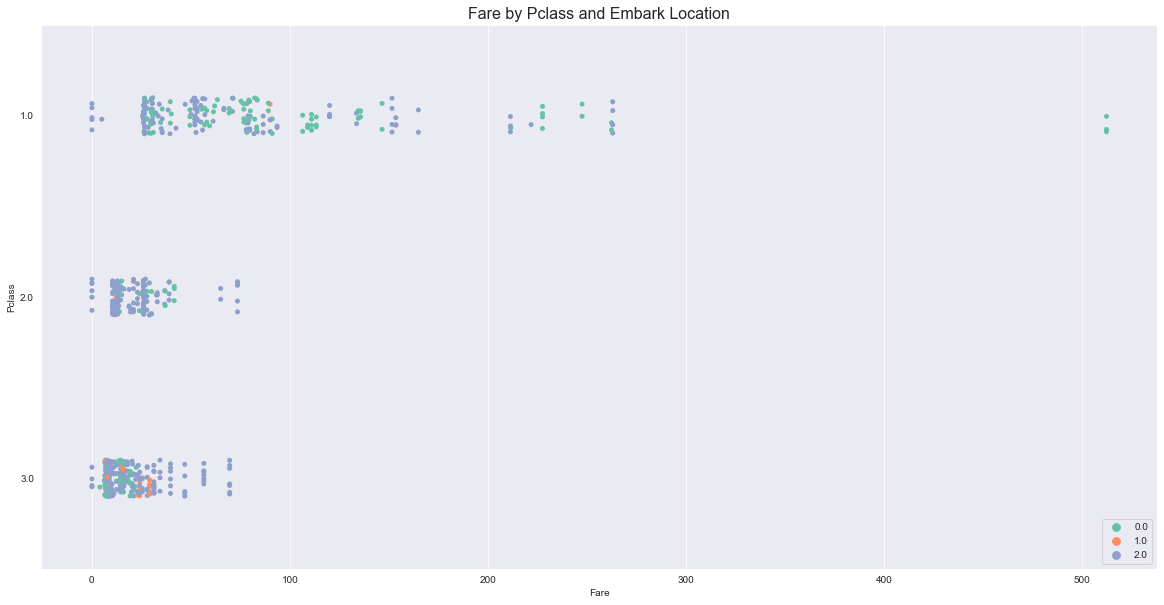

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.stripplot(data=titanic_train, x='Fare', palette='Set2', hue='Embarked', y='Pclass', orient='h',ax=ax)
ax.set_title('Fare by Pclass and Embark Location', fontsize='16')
ax.legend(loc=4);

(ok, but would prefer better graph to visualize this)

**Preprocessing**

In [21]:
ttX = titanic_train.drop(columns=['Survived'])
tty = titanic_train['Survived']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler

xtrain, xvalid, ytrain, yvalid = train_test_split(ttX,tty, test_size=.3, random_state=42)

In [22]:
col_scale = ['Age','SibSp','Parch','Fare']
scaler1 = StandardScaler().fit(xtrain[col_scale])
xtrain[col_scale] = scaler1.transform(xtrain[col_scale])

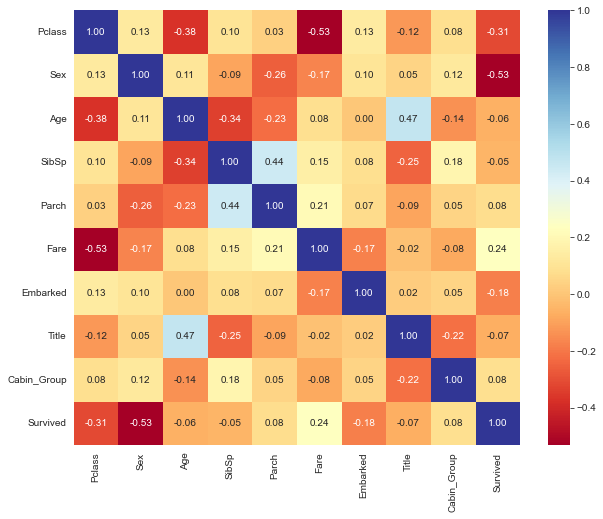

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(pd.concat([xtrain, ytrain], axis=1).corr(), cmap="RdYlBu", annot=True, fmt=".02f");

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = xtrain.columns

vif_data["VIF"] = [variance_inflation_factor(xtrain.values, i)
                          for i in range(len(xtrain.columns))]
  
print(vif_data)

       feature        VIF
0       Pclass  10.006037
1          Sex   3.322347
2          Age   1.627192
3        SibSp   1.413854
4        Parch   1.373310
5         Fare   1.266990
6     Embarked   4.908905
7        Title   7.104083
8  Cabin_Group   4.790604


**Build Model**

to consider - does model run better with OHE than LabelEncoder? does model run better without Cabin_Group feature?

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = dict()

    def fit(self, X, y=None):
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X.loc[X[col].notna(), col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))

            # Set unknown to new value so transform on test set handles unknown values
            max_value = max(le_dict.values())
            le_dict['_unk'] = max_value + 1

            self.encoders[col] = le_dict
        return self

    def transform(self, X, y=None):
        for col in X.columns:
            le_dict = self.encoders[col]
            X.loc[X[col].notna(), col] = X.loc[X[col].notna(), col].apply(
                lambda x: le_dict.get(x, le_dict['_unk'])).values
        return X

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)

In [31]:
cat_cols = ['Sex', 'Embarked', 'Title', 'Cabin_Group']
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

pipeExtracting = Pipeline(steps=[('Title_cabin', FunctionTransformer(Title_cabin)), ('convert_types', FunctionTransformer(convert_types))])

numerical = Pipeline(steps=[('imp_num',IterativeImputer(estimator=RandomForestRegressor(), initial_strategy='mean', max_iter=10, random_state=0)), ('standard scaler',StandardScaler())])
categorical = Pipeline(steps=[('label_encoder',CustomEncoder()), ('imp_cat',IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent', max_iter=10, random_state=0))])


transformer = ColumnTransformer(transformers=[('numerical',numerical,num_cols),('categorical',categorical,cat_cols)])

pipe = Pipeline([('pipeExtracting',pipeExtracting),('All Transformers', transformer), ('RFC model', RandomForestClassifier())])
                               

In [34]:
titanicX = titanic.drop(columns=['Survived', 'PassengerId'])
titanicY = titanic.Survived
xtrain, xvalid, ytrain, yvalid = train_test_split(titanicX,titanicY, test_size=.3, random_state=42)
pipe.fit(xtrain,ytrain)

TypeError: Cannot set a Categorical with another, without identical categories